In [1]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
#batch size; smaller for non-gpu

bs = 64
#bs = 16

In [3]:
path = untar_data(URLs.PETS); path

PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
path_anno = path/'annotations'
path_img = path/'images'

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/images/samoyed_174.jpg'),
 PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/images/pomeranian_32.jpg'),
 PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/images/pomeranian_173.jpg'),
 PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/images/boxer_190.jpg'),
 PosixPath('/home/maciek/.fastai/data/oxford-iiit-pet/images/Birman_30.jpg')]

In [10]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c: Union[pathlib.Path, str], check_ext: bool = True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [7]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

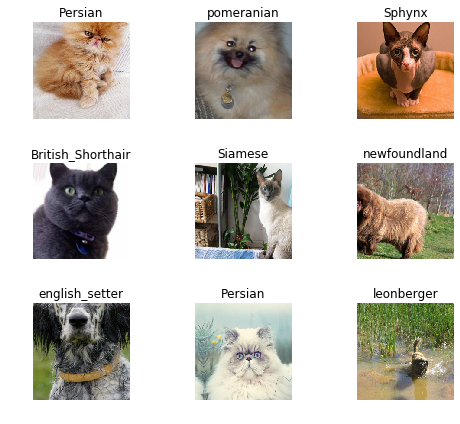

In [22]:
data.show_batch(rows=3, figsize=(7,6))

In [23]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [25]:
len(data.classes), data.c

(37, 37)

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/maciek/.torch/models/resnet34-333f7ec4.pth
87306240it [00:07, 11711496.48it/s]


In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.380515,0.345250,0.119756,07:27
1,0.543525,0.251944,0.084574,07:36
2,0.327117,0.229566,0.076455,07:28
3,0.249924,0.226339,0.079838,07:36


In [29]:
learn.save('stage-1')

In [31]:
interp = ClassificationInterpretation.from_learner(learn)


In [32]:
losses,idxs = interp.top_losses()

In [40]:
print(losses)

tensor([8.7659e+00, 6.3152e+00, 6.1007e+00,  ..., 3.8147e-06, 3.8147e-06,
        -0.0000e+00])


In [41]:
print(idxs)

tensor([ 999, 1155, 1244,  ...,  980,  211,  318])


In [34]:
len(data.valid_ds)==len(losses)==len(idxs)

True

In [46]:
len(losses)

1478

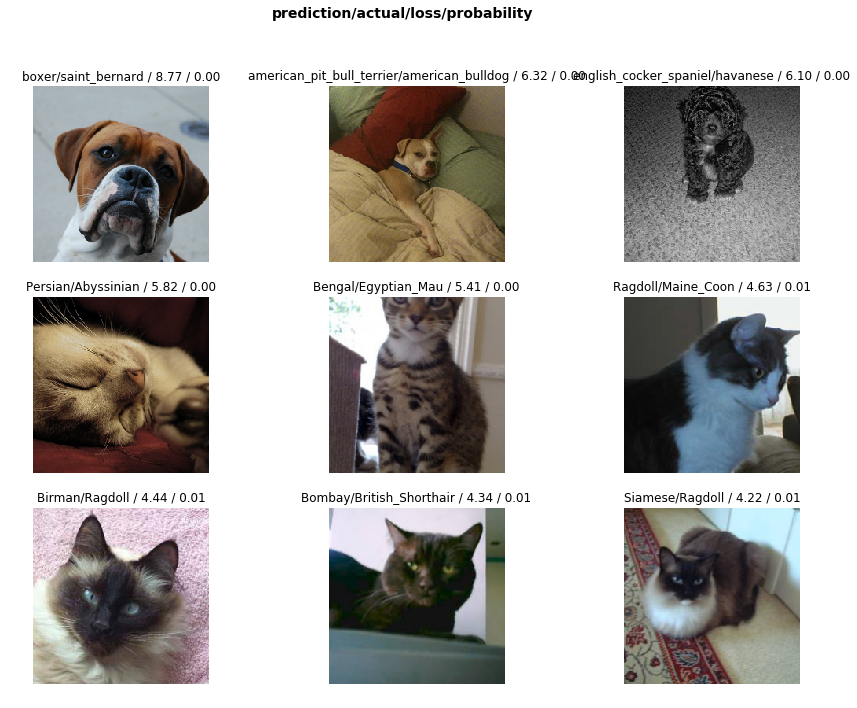

In [52]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [37]:
doc(interp.plot_top_losses)

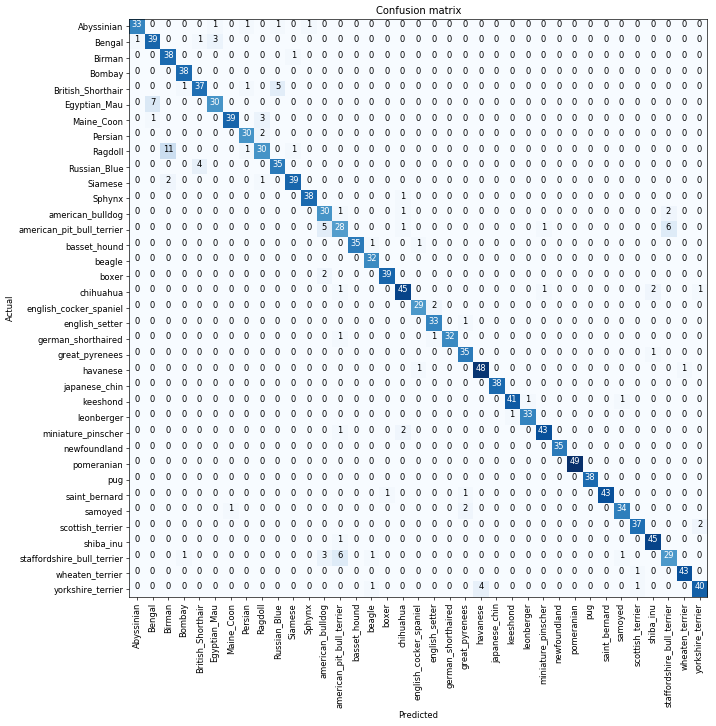

In [48]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60) 

Example of **confusion matrix** usage to evaluate the quality of the output of a classifier on the iris data set. The diagonal elements **represent the number of points** for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [50]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 11),
 ('Egyptian_Mau', 'Bengal', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

In [56]:
learn.unfreeze()

In [57]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.521188,0.341710,0.110961,10:02


In [59]:
learn.load('stage-1');   # ; nie wyswietla komunikatu o stanie learnera

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


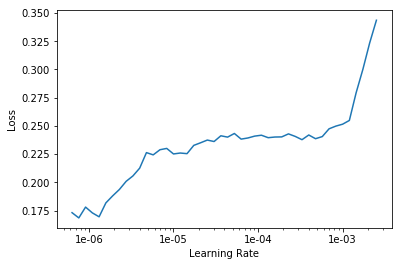

In [61]:
learn.recorder.plot()

In [68]:
learn.recorder.metrics

[]

In [62]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))  # or other, didn't run that one

## resnet50

In [7]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


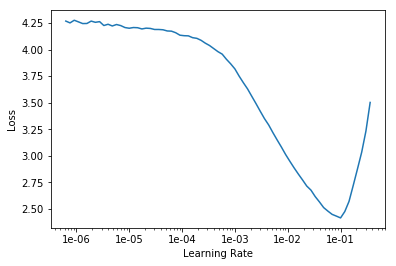

In [12]:
learn.recorder.plot()

In [10]:
learn.unfreeze()

In [11]:
learn.fit_one_cycle(8, max_lr=slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,3.291008,2.262865,0.466170,34:07


Traceback (most recent call last):
  File "/home/maciek/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/maciek/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/maciek/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/maciek/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


RuntimeError: DataLoader worker (pid 31532) is killed by signal: Killed. 